In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
path_data = os.path.join(os.getcwd(),os.pardir,os.pardir,'data')
data_list = os.listdir(path_data)
print(data_list)

['bleaching', 'fishing_activity', 'mmsi-daily-csvs-10-v2-2012', 'mmsi-daily-csvs-10-v2-2013', 'mmsi-daily-csvs-10-v2-2014', 'mmsi-daily-csvs-10-v2-2015', 'mmsi-daily-csvs-10-v2-2016', 'mmsi-daily-csvs-10-v2-2017', 'mmsi-daily-csvs-10-v2-2018', 'mmsi-daily-csvs-10-v2-2019', 'protected_area']


In [3]:
fishing_data_path = os.path.join(path_data,'fishing_activity')
year = 2018
filename = 'fishing_activity_'+ str(year) +'.csv'
fishing_data = pd.read_csv(os.path.join(fishing_data_path,filename),encoding='ISO-8859-1')
fishing_data = fishing_data[fishing_data['fishing_hours'] > 100]
# encoding='ISO-8859-1' for read_csv
print(len(fishing_data))

9036


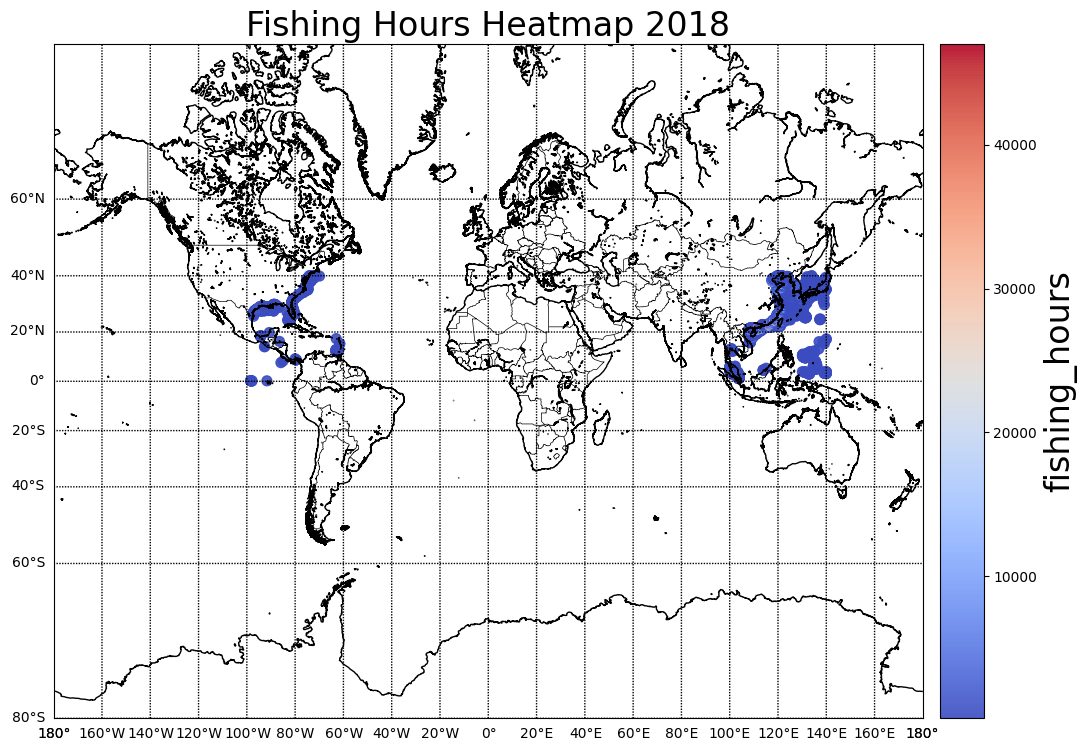

In [4]:

fontsize = 24
fontsize_title = 28
# Create a figure and axis with a size that you find appropriate
fig, ax = plt.subplots(figsize=(12, 10))

lat_min, lat_max = -80, 80
lon_min, lon_max = -180, 180

# Create a Basemap instance with a specific map projection, bounding lat/lon, and resolution
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max, resolution='i', ax=ax)

# Draw coastlines and countries for reference
m.drawcoastlines()
m.drawcountries()

# Convert your latitude and longitude to the map projection coordinates
x, y = m(fishing_data['cell_ll_lon'].values, fishing_data['cell_ll_lat'].values)
# x, y = m(fishing_data['lon_bin'].values, fishing_data['lat_bin'].values)

# Plot the heatmap using scatter, with the color intensity based on Percent_Bleaching
scatter = m.scatter(x, y, c=fishing_data['fishing_hours'], cmap='coolwarm', alpha=0.9, s=50)

# Create a colorbar and set its label
cb = m.colorbar(scatter, "right", size="5%", pad="2%")
cb.set_label('fishing_hours', fontsize=fontsize)

parallels = np.arange(lat_min, lat_max, 20.) # lines of latitude
meridians = np.arange(lon_min, lon_max, 20.) # lines of longitude
m.drawparallels(parallels, labels=[True,False,False,False])
m.drawmeridians(meridians, labels=[False,False,False,True])

# Show the plot
plt.title('Fishing Hours Heatmap' + ' ' + str(year), fontsize=fontsize)
# save to ./figures/
save_fig_folder = os.path.join(os.getcwd(),os.pardir,'figures')
if not os.path.exists(save_fig_folder):
    os.makedirs(save_fig_folder)
save_fig_path = os.path.join(save_fig_folder,'fishing_hours_' + str(year) + '.png')
plt.savefig(save_fig_path)
plt.show()
